# Prosper Loan Data Analysis
##### by Rosvita Robnik

## Preliminary Wrangling

The dataset I have been investigating belongs to Prosper's peer-to-peer platform that connects borrowers and lenders. 

In [115]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [116]:
# Load the dataset into a pandas dataframe
loans_archive = pd.read_csv('prosperLoanData.csv')

In [117]:
# Make a copy of the original dataset
loans = loans_archive.copy()

In [118]:
# Visual assessment
loans.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
64798,A0AE359629452805420D992,1072563,2013-12-04 20:43:06.580000000,NaN,60,Current,NaN,0.21832,0.1940,0.1840,...,-25.36,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
43496,F67B3587586989246F2DE9B,886370,2013-09-03 13:56:53.360000000,NaN,60,Current,NaN,0.28386,0.2579,0.2479,...,-41.19,0.0,0.00,0.00,0.0,1.0,0,0,0.0,24
39945,3DF33410332836736E1E7BF,259653,2008-01-03 17:07:19.430000000,HR,36,Completed,2011-01-07 00:00:00,0.20037,0.1820,0.1720,...,-16.76,0.0,0.00,0.00,0.0,1.0,0,0,0.0,6
91716,F9A23599130501295F329A0,1073845,2014-01-01 10:47:25.953000000,NaN,36,Current,NaN,0.19501,0.1585,0.1485,...,-5.60,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
17636,42BB358869917670282E009,886996,2013-09-03 12:35:54.800000000,NaN,60,Current,NaN,0.18136,0.1579,0.1479,...,-61.47,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
29613,30923536855908361EF9C4D,551632,2012-01-15 14:19:09.840000000,NaN,36,Completed,2013-05-17 00:00:00,0.12782,0.0999,0.0899,...,-160.48,0.0,0.00,0.00,0.0,1.0,0,0,0.0,47
55220,19EB3595406486095451E48,1051181,2013-12-05 06:36:57.973000000,NaN,60,Current,NaN,0.20808,0.1840,0.1740,...,-12.68,0.0,0.00,0.00,0.0,1.0,0,0,0.0,3
82574,BC273412323090946195F1A,280024,2008-02-15 06:06:36.800000000,HR,36,Chargedoff,2008-09-25 00:00:00,0.13119,0.1100,0.1000,...,-2.10,0.0,924.93,924.92,0.0,1.0,0,0,0.0,6
13444,064A3509559317795DEF2A7,496162,2011-03-01 08:54:27.643000000,NaN,36,Chargedoff,2012-01-23 00:00:00,0.30532,0.2699,0.2599,...,-4.95,0.0,1888.65,1888.65,0.0,1.0,0,0,0.0,1
105124,D16D336454481711525C051,20100,2006-06-16 10:47:03.087000000,HR,36,Completed,2009-06-19 00:00:00,0.22525,0.2075,0.2025,...,-8.90,0.0,0.00,0.00,0.0,1.0,0,0,0.0,7


In [119]:
# Visually check data in columns 
# (to better understand the data and to help me make a decision which variables to analyse)
col_9 = loans.loc[: , 'ListingKey':'BorrowerRate']
col_18 = loans.loc[: , 'LenderYield':'BorrowerState']
col_27 = loans.loc[: , 'Occupation':'CreditScoreRangeUpper']
col_36 = loans.loc[: , 'FirstRecordedCreditLine':'CurrentDelinquencies']
col_45 = loans.loc[: , 'AmountDelinquent':'TradesNeverDelinquent (percentage)']
col_54 = loans.loc[: , 'TradesOpenedLast6Months':'OnTimeProsperPayments']
col_63 = loans.loc[: , 'ProsperPaymentsLessThanOneMonthLate':'LoanNumber']
col_72 = loans.loc[: , 'LoanOriginalAmount':'LP_ServiceFees']
col_81 = loans.loc[: , 'LP_CollectionFees':'Investors']
display(col_9.sample(3))
display(col_18.sample(3))
display(col_27.sample(3))
display(col_36.sample(3))
display(col_45.sample(3))
display(col_54.sample(3))
display(col_63.sample(3))
display(col_72.sample(3))
display(col_81.sample(3))

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate
112082,33DF3583781490640CADE61,835311,2013-07-11 11:06:28.953000000,NaN,60,Current,NaN,0.15629,0.1334
1316,43523381893398590E5F168,101143,2007-02-18 17:17:43.283000000,HR,36,Defaulted,2008-02-05 00:00:00,0.21480,0.2000
9408,5BBA356031862094343AB82,651065,2012-10-08 11:33:40.160000000,NaN,60,Current,NaN,0.28848,0.2624


,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState
19327,0.2204,0.20169,0.1125,0.08919,3.0,D,3.0,7,NY
66883,0.1349,0.13260,0.0520,0.08060,5.0,B,7.0,1,CA
28624,0.1599,0.15710,0.0595,0.09760,5.0,B,8.0,1,NY


,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper
108326,Accountant/CPA,Full-time,53.0,True,False,NaN,2008-06-19 04:55:03.977000000,780.0,799.0
110347,Principal,Employed,261.0,True,False,NaN,2013-05-28 16:09:51,720.0,739.0
73306,Other,Retired,10.0,False,False,NaN,2007-06-26 15:23:03.530000000,660.0,679.0


,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies
55863,1994-12-02 00:00:00,12.0,11.0,45.0,8,1245.0,0.0,3.0,0.0
90337,1993-11-30 00:00:00,9.0,9.0,32.0,6,793.0,0.0,4.0,0.0
103278,2001-05-03 00:00:00,11.0,10.0,32.0,7,276.0,8.0,15.0,0.0


,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage)
58847,0.0,0.0,0.0,0.0,7442.0,0.88,755.0,16.0,0.88
95901,0.0,0.0,0.0,0.0,23725.0,0.96,776.0,40.0,1.00
30219,0.0,0.0,0.0,0.0,2884.0,0.04,58216.0,21.0,0.90


,TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments
39818,0.0,0.13,"$50,000-74,999",True,4583.333333,25B335944251661677D045C,NaN,NaN,NaN
55977,0.0,0.29,"$50,000-74,999",True,4325.666667,F8723682811121942E5F204,NaN,NaN,NaN
104512,1.0,0.08,"$25,000-49,999",True,2083.333333,7721364558536791560ED52,NaN,NaN,NaN


,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber
66811,NaN,NaN,NaN,NaN,NaN,0,NaN,1,131453
14000,NaN,NaN,NaN,NaN,NaN,0,NaN,4,109230
23893,NaN,NaN,NaN,NaN,NaN,0,NaN,67,34940


,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees
56210,9000,2013-12-18 00:00:00,Q4 2013,D8FD3701627969085946975,235.45,470.90,175.76,295.14,-15.21
93804,10000,2013-12-30 00:00:00,Q4 2013,30E53701149626694D01CF0,313.78,627.56,496.15,131.41,-16.24
96974,6000,2011-07-12 00:00:00,Q3 2011,96AF342749586123192DE35,197.57,6387.10,5380.55,1006.55,-88.28


,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
89367,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
29212,0.0,0.0,0.0,0.0,1.0,0,0,0.0,26
63845,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [120]:
# Programmatic assessment
print(loans.duplicated().sum())

0


In [121]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [122]:
# Convert variables' types


In [123]:
# Improve columns' names

In [157]:
# Descriptive statistics for numeric variables
pd.set_option('display.max_columns', 61)
loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

### What is the structure of your dataset?

> The data set contains 113,937 loans with 81 variables on each loan, that are related to loan details (e.g. interest rate, amount, length, etc.), borrowers' data (e.g. occupation, home-ownership, credit rating, etc.) and some other kind of data (e.g. number of investors for a loan).

### What is/are the main feature(s) of interest in your dataset?

> I would like to get a better picture, whether I could possibly get a cheap loan, and on the other hand what yield I can expect as a lender, taking into consideration especially risk. As a potential lender, I am also curious for what purposes people raise loans and what is their background.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that I will find some strong correlations, e.g. the better borrower's credit rating the lower interest rate, and from the lender's perspective, the lower risk the lower yield.

## Univariate Exploration

> Firstly, I would like to see some general information about loans and borrowers.

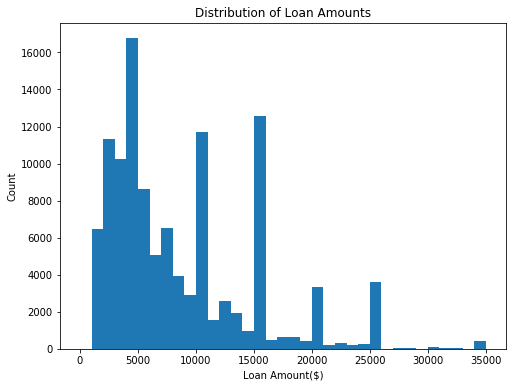

In [125]:
plt.figure(figsize = [8, 6])
bin_size = 1000
bin_edges = np.arange(0, loans['LoanOriginalAmount'].max() + bin_size, bin_size)
plt.hist(data = loans, x = 'LoanOriginalAmount', bins = bin_edges)
plt.xlabel('Loan Amount($)')
plt.ylabel('Count')
plt.title('Distribution of Loan Amounts')
plt.show()

The borrowed amount starts at as little as 1000 USD and the highest one is 35k. The average loan is 8337 USD and the median is calculated at 6500 USD. The most borrowers, over 16000 of them, raised the loan in amount of 4000 USD. Further most frequent loan amounts are 16k, 11k and 3k.

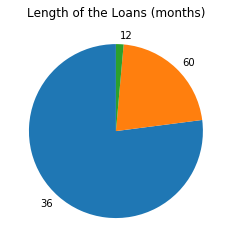

In [149]:
length = loans['Term'].value_counts()
plt.pie(length, labels = length.index, startangle = 90)
plt.title('Length of the Loans (months)');

There are only three lengths of loans - 12, 36 and 60 months. More than three quarters are of the length 36 months and less than one quarter represents loans in duration 60 months. 

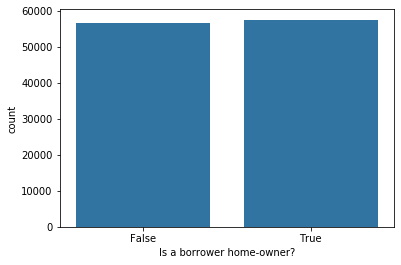

In [142]:
base_colour = sb.color_palette()[0]
sb.countplot(data = loans, x = 'IsBorrowerHomeowner', color = base_colour)
plt.xlabel('Is a borrower home-owner?');

Somehow I expected any other result but a draw. In other words, this result encourage me to investigate further relationship of this fact with other variables, perhaps the borrowed amount, or a purpose of the loan, or maybe occupation?

My next curiosities are where are the borrowers from and what are their occupations.

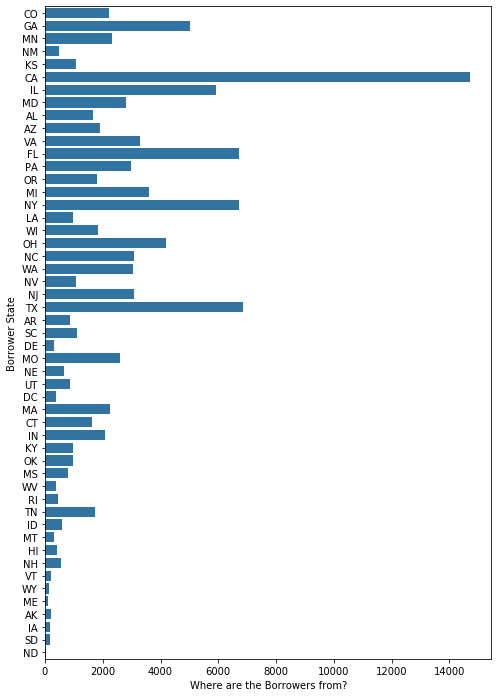

In [148]:
plt.figure(figsize = [8, 12])
base_colour = sb.color_palette()[0]
sb.countplot(data = loans, y = 'BorrowerState', color = base_colour)
plt.ylabel('Borrower State')
plt.xlabel('Where are the Borrowers from?');

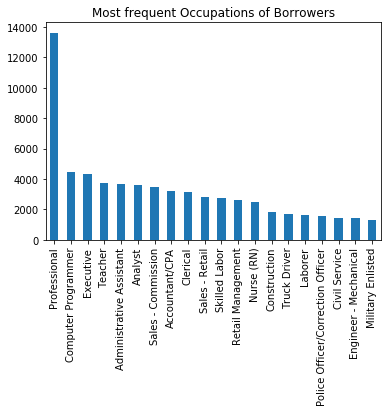

In [159]:
loans_occupation = loans[loans.Occupation.str.contains("Other") == False]
loans_occupation.Occupation.value_counts().nlargest(20).plot(kind ='bar')
plt.title('Most frequent Occupations of Borrowers');

I somehow expected that lots of borrowers would come from California. But twice as many than from New York, Florida or Texas? <br>
None of the occupations does not stand out; the "Professional" can contain many different professions.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!